# Masters Project 
##### Submitted by Teja Sanaka, Divya Aitipamula and Divya Nunnety

# Problem Statement:

You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

# Features:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

Price: The price of the used car in INR Lakhs.

# INTRODUCTION:

In this notebook we have analised the dataset with three different algorithms
1. Linear Regression Algorithm
2. Random Forest Tree Regression Algorithm
3. Decision Tree Algorithm
4. Support Vector Machines
5. Gradient Boosting Algorithm

# IMPORTING LIBS:

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import collections
from sklearn.metrics import r2_score
import re
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
%matplotlib inline

# IMPORTING DATASET:

In [41]:
df_train = pd.read_excel("Data_Train.xlsx")
df_test = pd.read_excel("Data_Test.xlsx")

In [42]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


# CLEANING DATASET & MISSING VALUES:

#### Number of null row in columns

In [43]:
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [44]:
df_train.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

#### Percentage of data missing

In [45]:
(df_train.isnull().sum() / len(df_train)) * 100

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.033228
Engine               0.598106
Power                0.598106
Seats                0.697790
Price                0.000000
dtype: float64

#### Renaming columns of dataset

In [46]:
df_train.insert(0, 'id', range(0, 0 + len(df_train)))
df_train.head()

,id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [47]:
df_test.insert(0,'id',range(0,len(df_test)))
df_test.head()

,id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [48]:
df_train.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

### Seats Column

In [49]:
df_train.groupby('Seats')['id'].nunique()
df_test.groupby('Seats')['id'].nunique()

Seats
2.0        2
4.0       20
5.0     1033
6.0        7
7.0      122
8.0       36
10.0       3
Name: id, dtype: int64

In [50]:
df_train['Seats'].mode()
df_test['Seats'].mode()

0    5.0
dtype: float64

In [51]:
df_train["Seats"].fillna(value = 5.0, inplace=True)
df_train.Seats[df_train.Seats == 0.0] = 5.0
df_train.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                 0
Price                 0
dtype: int64

In [52]:
df_test["Seats"].fillna(value = 5.0, inplace=True)
df_test.Seats[df_test.Seats == 0.0] = 5.0
df_test.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                 0
dtype: int64

### Mileage Column

In [53]:
df_train.groupby('Mileage')['id'].nunique()

Mileage
0.0 kmpl      68
10.0 kmpl     10
10.1 kmpl      7
10.13 kmpl     3
10.2 kmpl      6
              ..
9.52 kmpl      2
9.7 kmpl       1
9.74 kmpl      2
9.8 kmpl       4
9.9 kmpl       3
Name: id, Length: 442, dtype: int64

In [54]:
df_test.groupby('Mileage')['id'].nunique()

Mileage
0.0 kmpl      13
10.0 kmpl      3
10.1 kmpl      3
10.13 kmpl     1
10.2 kmpl      3
              ..
8.45 kmpl      1
8.7 kmpl       1
9.0 kmpl       1
9.1 kmpl       2
9.74 kmpl      2
Name: id, Length: 301, dtype: int64


#### *Removing the string part and converting to the float, Taking mode and will replace emply rows with mode* 

In [55]:


df_train.Mileage[df_train.Mileage == '0.0 kmpl'] = np.nan
df_train['Mileage'] = df_train['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
df_train['Mileage'] = df_train['Mileage'].astype(float)
df_train['Mileage'].mode()

0    17.0
dtype: float64

In [56]:
df_test.Mileage[df_test.Mileage == '0.0 kmpl'] = np.nan
df_test['Mileage'] = df_test['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
df_test['Mileage'] = df_test['Mileage'].astype(float)
df_test['Mileage'].mode()

0    17.0
dtype: float64

In [57]:
df_train['Mileage'].fillna(value = 17.0, inplace = True)
df_train.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                 0
Price                 0
dtype: int64

In [58]:
df_test['Mileage'].fillna(value = 17.0, inplace = True)
df_test.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                 0
dtype: int64

### Engine Column

In [59]:
df_train.groupby('Engine')['id'].nunique()

Engine
1047 CC      4
1061 CC     30
1086 CC    108
1120 CC     54
1150 CC      7
          ... 
970 CC       1
993 CC      14
995 CC      10
998 CC     259
999 CC      29
Name: id, Length: 146, dtype: int64

In [60]:
df_test.groupby('Engine')['id'].nunique()

Engine
1047 CC     1
1061 CC     2
1086 CC    21
1120 CC     6
1150 CC     1
           ..
814 CC     15
936 CC      4
995 CC      5
998 CC     50
999 CC      7
Name: id, Length: 104, dtype: int64

#### *Removing the string part and converting to the float, Taking mode and will replace emply rows with mode* 

In [61]:
df_train['Engine'] = df_train['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_train['Engine'] = df_train['Engine'].astype(float)
df_train['Engine'].mode()

0    1197.0
dtype: float64

In [62]:
df_test['Engine'] = df_test['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_test['Engine'] = df_test['Engine'].astype(float)
df_test['Engine'].mode()

0    1197.0
dtype: float64

In [63]:
df_train['Engine'].fillna(value = 1197.0, inplace = True)
df_train.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                36
Seats                 0
Price                 0
dtype: int64

In [64]:
df_test['Engine'].fillna(value = 1197.0, inplace = True)
df_test.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                10
Seats                 0
dtype: int64

### Power Column

In [65]:
df_train['Power'] = df_train['Power'].str.split(' ').str[0]
# including nan rows there is data in this column of 'null' value
df_train.Power[df_train.Power == 'null'] = np.NaN
df_train['Power'].isnull().sum()

143

In [66]:
df_test['Power'] = df_test['Power'].str.split(' ').str[0]
# including nan rows there is data in this column of 'null' value
df_test.Power[df_test.Power == 'null'] = np.NaN
df_test['Power'].isnull().sum()

32

In [67]:
df_train['Power'] = df_train['Power'].astype(float)
df_train['Power'].mode()

0    74.0
dtype: float64

In [68]:
df_test['Power'] = df_test['Power'].astype(float)
df_test['Power'].mode()

0    74.0
dtype: float64

In [69]:
df_train['Power'].fillna(value = 74, inplace = True)
df_train.isna().sum()

id                   0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [70]:
df_test['Power'].fillna(value = 74, inplace = True)
df_test.isna().sum()

id                   0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

### Name Column

In [71]:
df_train['Name'] = df_train['Name'].str.split(' ').str[0]
df_train.groupby('Name')['id'].nunique()

Name
Ambassador          1
Audi              236
BMW               267
Bentley             1
Chevrolet         121
Datsun             13
Fiat               28
Force               3
Ford              300
Honda             608
Hyundai          1107
ISUZU               2
Isuzu               1
Jaguar             40
Jeep               15
Lamborghini         1
Land               60
Mahindra          272
Maruti           1211
Mercedes-Benz     318
Mini               26
Mitsubishi         27
Nissan             91
Porsche            18
Renault           145
Skoda             173
Smart               1
Tata              186
Toyota            411
Volkswagen        315
Volvo              21
Name: id, dtype: int64

In [72]:
df_test['Name'] = df_test['Name'].str.split(' ').str[0]
df_test.groupby('Name')['id'].nunique()

Name
Audi              49
BMW               45
Bentley            1
Chevrolet         30
Datsun             4
Fiat              10
Ford              51
Hindustan          1
Honda            135
Hyundai          233
ISUZU              1
Isuzu              1
Jaguar             8
Jeep               4
Land               7
Mahindra          59
Maruti           233
Mercedes-Benz     62
Mini               5
Mitsubishi         9
Nissan            26
OpelCorsa          1
Porsche            1
Renault           25
Skoda             29
Tata              42
Toyota            96
Volkswagen        59
Volvo              7
Name: id, dtype: int64

In [73]:
df_test.Name[df_test.Name == 'Isuzu'] = 'ISUZU'

In [74]:
df_train.Name[df_train.Name == 'Isuzu'] = 'ISUZU'

In [75]:
df_test.head()

,id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,Maruti,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,1,Maruti,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,2,Toyota,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,3,Toyota,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,74.00,5.0
4,4,Hyundai,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0


In [76]:
df_train.head()

,id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### Data is for Visualizing with cleaned dataset

In [77]:
del df_train['id']

In [78]:
del df_test['id']

In [79]:
dataset = df_train.copy()
dataset_test=df_test.copy()

In [80]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [81]:
df_test.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object

#### Converting datatypes from int to float

In [82]:
df_train['Year'] = df_train['Year'].astype(float)
df_train['Kilometers_Driven'] = df_train['Kilometers_Driven'].astype(float)

In [83]:
df_test['Year'] = df_test['Year'].astype(float)
df_test['Kilometers_Driven'] = df_test['Kilometers_Driven'].astype(float)

In [84]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [85]:
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Delhi,2014.0,40929.0,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti,Coimbatore,2013.0,54493.0,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota,Mumbai,2017.0,34000.0,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota,Hyderabad,2012.0,139000.0,Diesel,Manual,First,23.59,1364.0,74.00,5.0
4,Hyundai,Mumbai,2014.0,29000.0,Petrol,Manual,First,18.50,1197.0,82.85,5.0


In [86]:
#### For improving the prediction values

df_train['Price_log'] = np.log1p(df_train['Price'].values)
del df_train['Price']



# EXPLORATORY DATA ANALYSIS:

### Year wise count

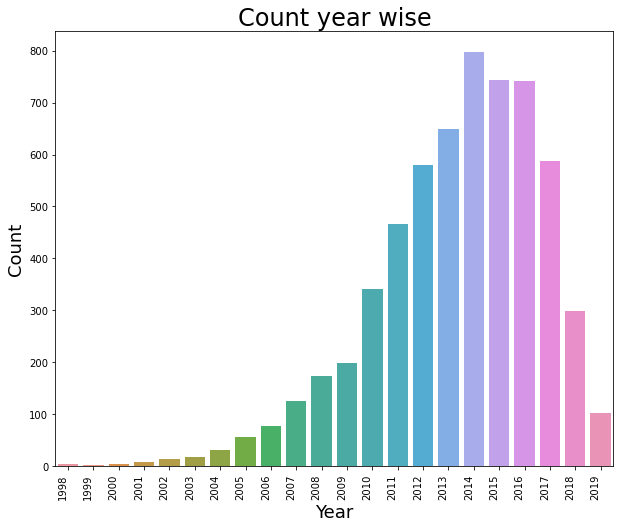

In [87]:
plt.figure(figsize = (10,8))
bar1 = sns.countplot(dataset['Year'])
bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Count year wise', size = 24)
plt.xlabel('Year', size = 18)
plt.ylabel('Count', size = 18)
plt.show()


### Name Type wise count

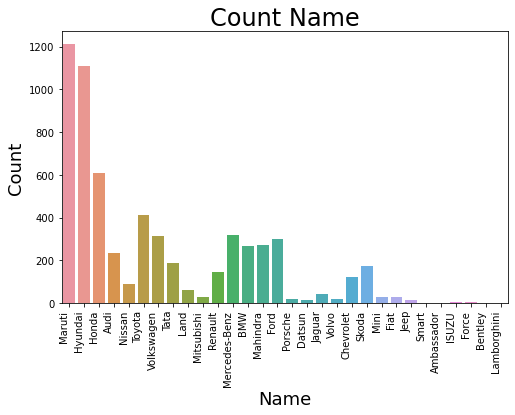

In [88]:
plt.figure(figsize = (8,5))
bar1 = sns.countplot(dataset['Name'])
bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Count Name', size = 24)
plt.xlabel('Name', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

### Seats Type wise count

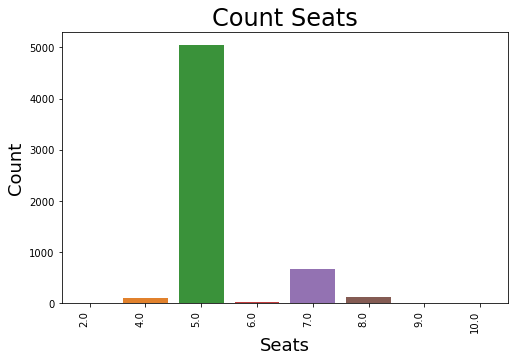

In [89]:
plt.figure(figsize = (8,5))
bar1 = sns.countplot(dataset['Seats'])
bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Count Seats', size = 24)
plt.xlabel('Seats', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

### Owner Type wise count

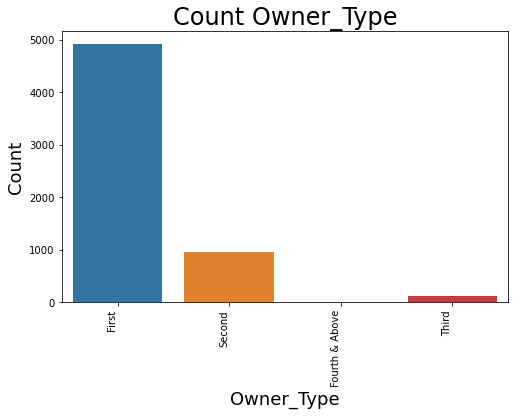

In [90]:
plt.figure(figsize = (8,5))
bar1 = sns.countplot(dataset['Owner_Type'])
bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Count Owner_Type', size = 24)
plt.xlabel('Owner_Type', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

### Mileage wise count

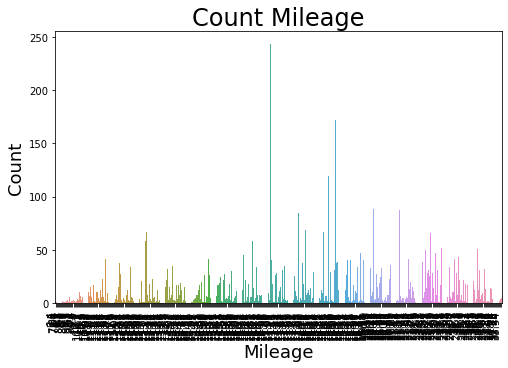

In [91]:
plt.figure(figsize = (8,5))
bar1 = sns.countplot(dataset['Mileage'])
bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Count Mileage', size = 24)
plt.xlabel('Mileage', size = 18)
plt.ylabel('Count', size = 18)
plt.show()



### Fuel Types count

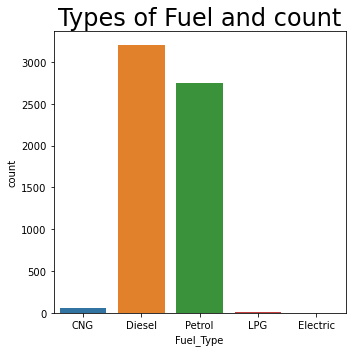

In [92]:
plt.figure(figsize = (5,5))
sns.countplot(dataset['Fuel_Type'])
plt.title('Types of Fuel and count', size = 24)
plt.tight_layout()
plt.show()

### Types of Transmission and count

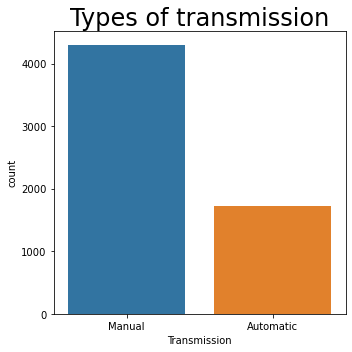

In [93]:
plt.figure(figsize = (5,5))
sns.countplot(dataset['Transmission'])
plt.title('Types of transmission', size = 24)
plt.tight_layout()
plt.show()

In [94]:
plt.style.use('ggplot')
colors = ['#FF8C73','#66b3ff','#99ff99','#CA8BCA', '#FFB973', '#89DF38', '#8BA4CA', '#ffcc99', 
          '#72A047', '#3052AF', '#FFC4C4']

### Loction graph and percentage

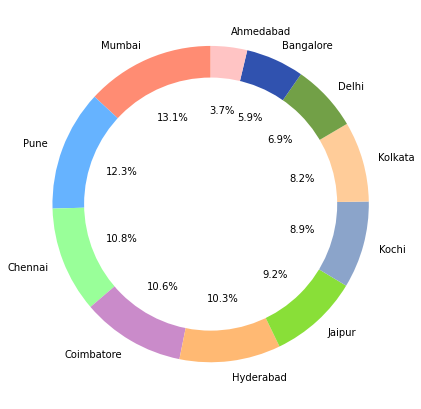

In [95]:
plt.figure(figsize = (6,6))
plt.pie(dataset['Location'].value_counts(), startangle = 90, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Location'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

### Name graph and percentage

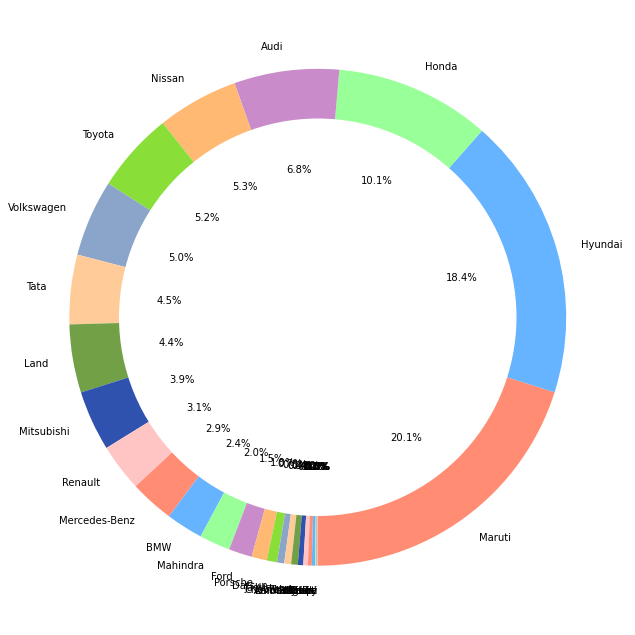

In [96]:
plt.figure(figsize = (9,9))
plt.pie(dataset['Name'].value_counts(), startangle = -90, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Name'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

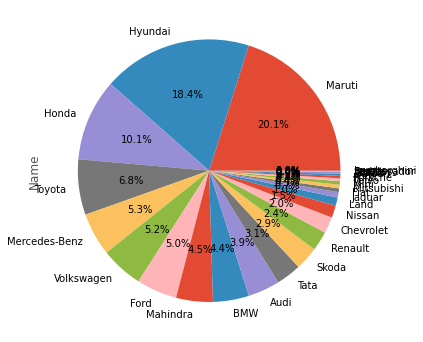

In [97]:
plt.figure(figsize=(20,10))
plt.subplot(131)
df_train['Name'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### Year graph and percentage

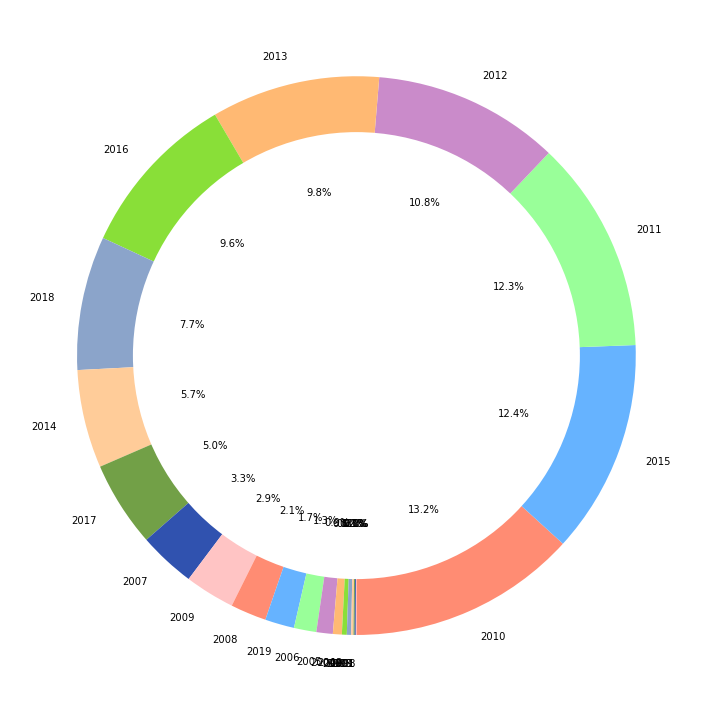

In [98]:
plt.figure(figsize = (10,10))
plt.pie(dataset['Year'].value_counts(), startangle = -90, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Year'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

### Fuel_Type graph and percentage

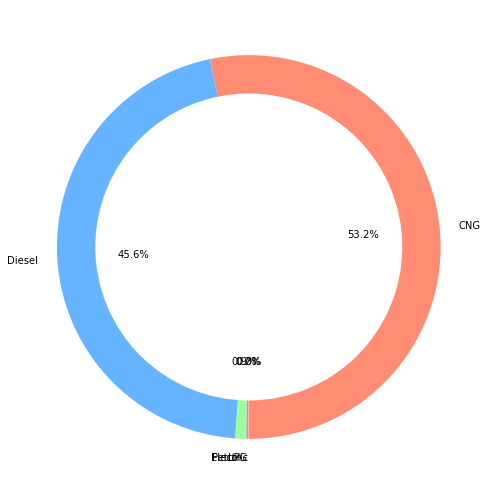

In [99]:
plt.figure(figsize = (7,7))
plt.pie(dataset['Fuel_Type'].value_counts(), startangle = -90, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Fuel_Type'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

### Transmission graph and percentage

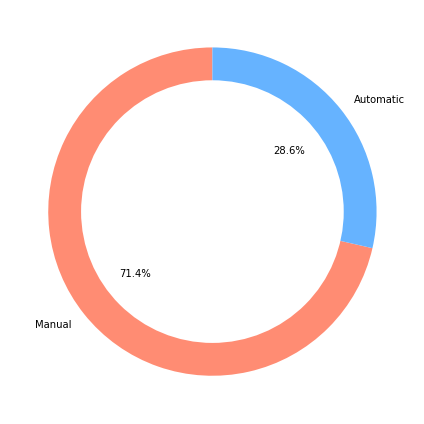

In [100]:
plt.figure(figsize = (6,6))
plt.pie(dataset['Transmission'].value_counts(), startangle = 90, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Transmission'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

### Owner_Type graph and percentage

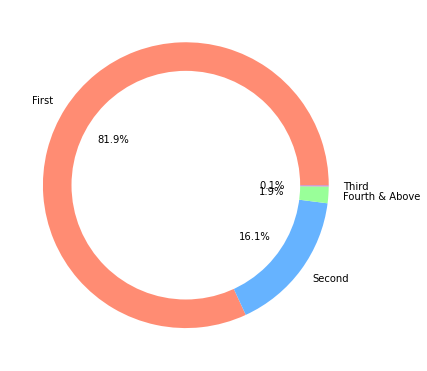

In [101]:
plt.figure(figsize = (6,6))
plt.pie(dataset['Owner_Type'].value_counts(), startangle = 0, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Owner_Type'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

### Seats graph and percentage

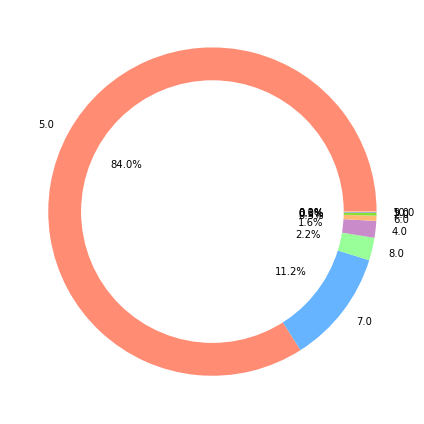

In [102]:
plt.figure(figsize = (6,6))
plt.pie(dataset['Seats'].value_counts(), startangle = 0, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Seats'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

In [103]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_log
0,Maruti,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.011601
1,Hyundai,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.602690
2,Honda,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.704748
3,Maruti,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.945910
4,Audi,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.930660


In [104]:
df_train.shape

(6019, 12)

In [105]:
from scipy import stats

## Checking for outliers And removing them by help of z score


Text(0.5, 1.0, 'Outliers for Engine')

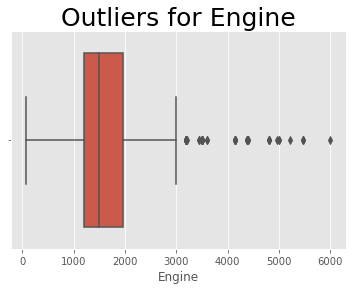

In [106]:
sns.boxplot(x=df_train['Engine'])
plt.title('Outliers for Engine',fontsize=25)

In [107]:
z=np.abs(stats.zscore(df_train.Engine))

In [108]:
threshold=3
print(np.where(z>3))

(array([  70,  152,  459,  586,  589,  693,  798,  926, 1038, 1093, 1352,
       1596, 1930, 2100, 2305, 2681, 2978, 3065, 3242, 3341, 3580, 4039,
       4136, 4342, 4388, 4451, 4559, 4627, 4691, 4722, 4821, 4869, 4938,
       5088, 5341, 5414, 5416, 5521, 5603, 5728, 5781, 5885, 5919, 6011],
      dtype=int64),)


In [109]:
df_train=df_train[(z<3)]
df_train.shape

(5975, 12)

Text(0.5, 1.0, 'After outliers removal')

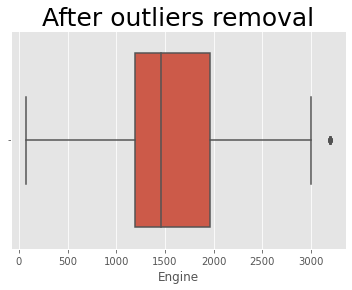

In [110]:
sns.boxplot(x=df_train['Engine'])
plt.title('After outliers removal',fontsize=25)

Text(0.5, 1.0, 'Outliers for Mileage')

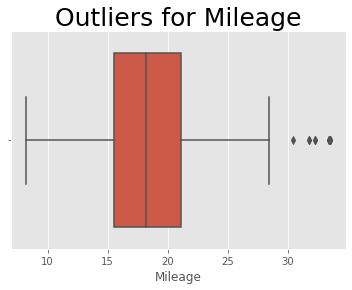

In [111]:
sns.boxplot(x=df_train['Mileage'])
plt.title('Outliers for Mileage',fontsize=25)

In [112]:
z=np.abs(stats.zscore(df_train.Mileage))

In [113]:
threshold=3
print(np.where(z>3))
df_train=df_train[(z<3)]

(array([1259, 1322, 2046, 2356, 2685, 3101, 3111, 3533, 3848, 4118, 4739,
       5144, 5892], dtype=int64),)


In [114]:
df_train.shape

(5962, 12)

Text(0.5, 1.0, 'After removing outliers')

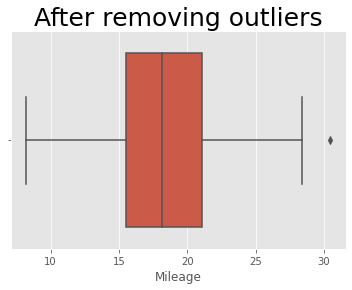

In [115]:

sns.boxplot(x=df_train['Mileage'])
plt.title('After removing outliers',fontsize=25)

Text(0.5, 1.0, 'Outliers for Power')

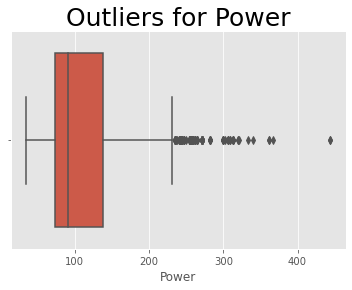

In [116]:
sns.boxplot(x=df_train['Power'])
plt.title('Outliers for Power',fontsize=25)

In [117]:
df_train.shape

(5962, 12)

In [118]:
from scipy import stats
z=np.abs(stats.zscore(df_train.Power))
threshold=3

In [119]:
df_train=df_train[(z<3)]


Text(0.5, 1.0, 'After removing outliers')

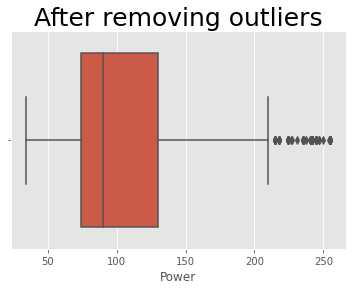

In [120]:
sns.boxplot(x=df_train['Power'])
plt.title('After removing outliers',fontsize=25)

In [121]:
df_train.shape

(5867, 12)

Text(0.5, 1.0, 'Outliers for year')

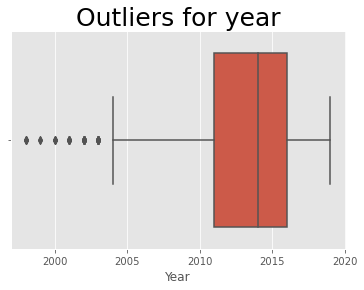

In [122]:
 sns.boxplot(x=df_train['Year'])
plt.title('Outliers for year',fontsize=25)

In [123]:
z=np.abs(stats.zscore(df_train.Year))
threshold=3
df_train=df_train[(z<3)]

Text(0.5, 1.0, 'After removing outliers')

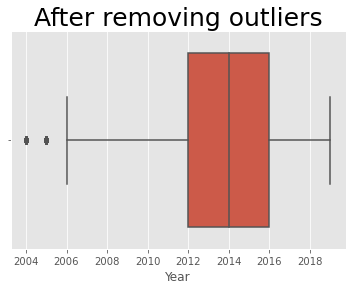

In [124]:
 sns.boxplot(x=df_train['Year'])
plt.title('After removing outliers',fontsize=25)

<AxesSubplot:xlabel='Seats'>

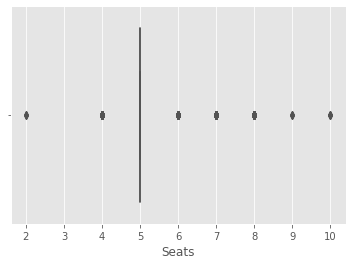

In [125]:
 sns.boxplot(x=df_train['Seats'])

In [126]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_log
0,Maruti,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.011601
1,Hyundai,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.602690
2,Honda,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.704748
3,Maruti,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.945910
4,Audi,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.930660


## Checking for relationship among variables

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price_log
Year,1.000000,-0.450667,0.295911,-0.052041,0.040609,0.016459,0.486159
Kilometers_Driven,-0.450667,1.000000,-0.150563,0.205181,0.038042,0.204106,-0.167651
Mileage,0.295911,-0.150563,1.000000,-0.641404,-0.549194,-0.381095,-0.295028
Engine,-0.052041,0.205181,-0.641404,1.000000,0.831638,0.516211,0.674057
Power,0.040609,0.038042,-0.549194,0.831638,1.000000,0.203067,0.788801
Seats,0.016459,0.204106,-0.381095,0.516211,0.203067,1.000000,0.211147
Price_log,0.486159,-0.167651,-0.295028,0.674057,0.788801,0.211147,1.000000


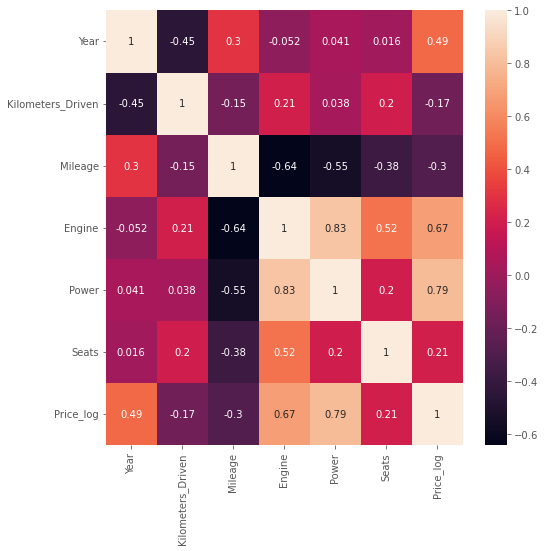

In [127]:
plt.figure(figsize=(8,8))
c= df_train.corr()
sns.heatmap(c,xticklabels=c.columns,yticklabels=c.columns
            ,annot=True)
c

### From the above heat map it can be concluded that price of the car is mainly depending on Power, Engine and year

## Visualizing the data

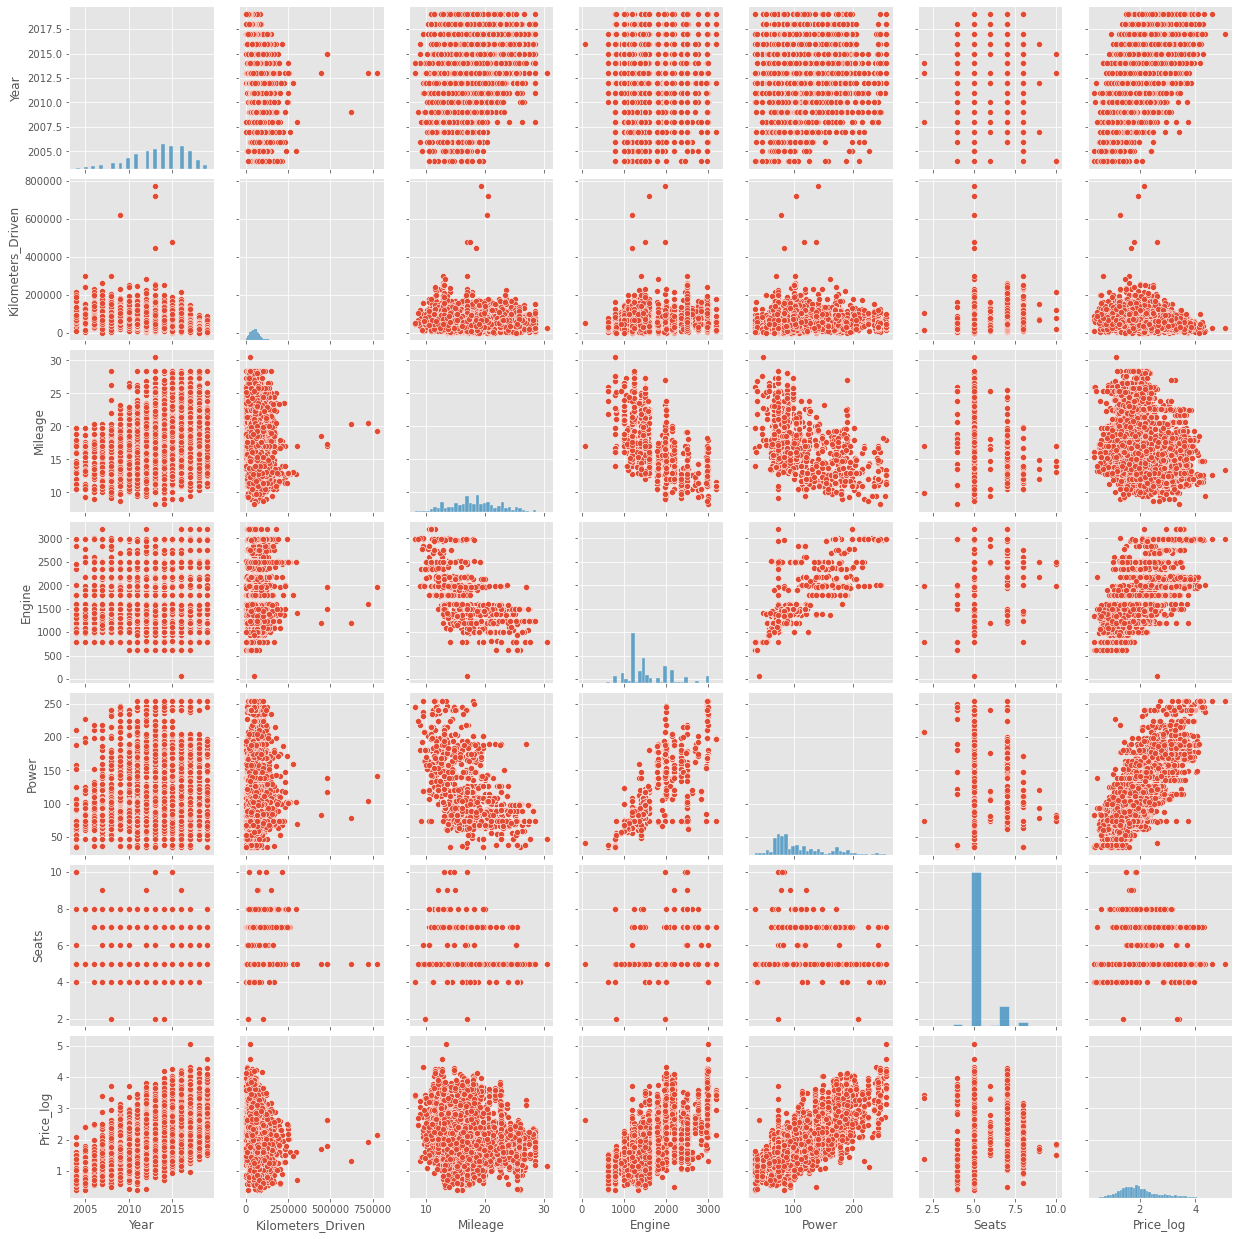

In [128]:
sns.pairplot(df_train)

## Checking For relations among the price and other variables

<AxesSubplot:xlabel='Price_log', ylabel='Seats'>

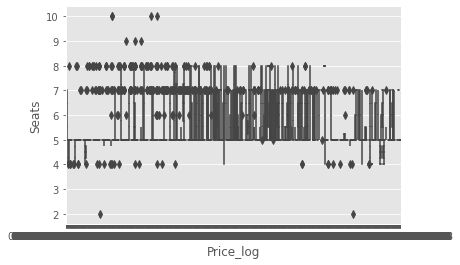

In [129]:
sns.boxplot(x='Price_log',y='Seats',data=df_train)

Text(0.5, 1.0, 'Relation Between Price and Company')

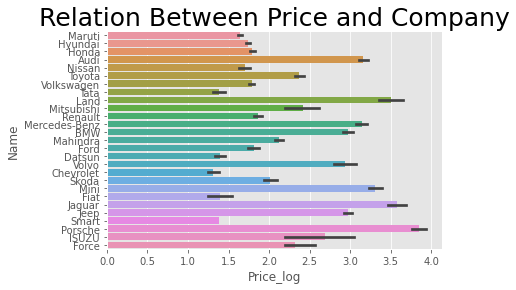

In [130]:
sns.barplot( x="Price_log", y="Name", data=df_train)
plt.title('Relation Between Price and Company',fontsize=25)

### Here we can see that cars like Porsche ,Jaguar and Land are very costly as compared to others

<AxesSubplot:title={'center':'Relation Between Price and Location'}, xlabel='Price_log', ylabel='Location'>

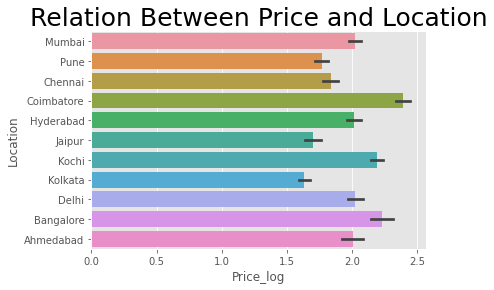

In [131]:
plt.title('Relation Between Price and Location',fontsize=25)
sns.barplot( x="Price_log", y="Location", data=df_train)

### Price of cars belonging to Coimbtaore is highest followed by Bangalore and Kochi as compared to others


### Similalry we can see relation of price of car with city

Text(0.5, 1.0, 'Relation Between Price and Year')

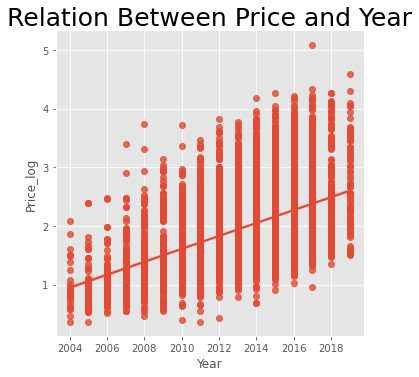

In [132]:

sns.lmplot('Year','Price_log',data=df_train)
plt.title('Relation Between Price and Year',fontsize=25)

### From above plot it's clear that price of cars are increasing with the year

Text(0.5, 1.0, 'Relation Between Price and Kilometers Driven')

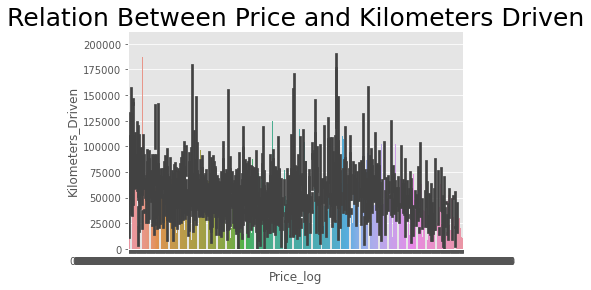

In [133]:
sns.barplot( x="Price_log", y="Kilometers_Driven", data=df_train)
plt.title('Relation Between Price and Kilometers Driven',fontsize=25)

Text(0.5, 1.0, 'Relation Between Price and Kilometres Driven')

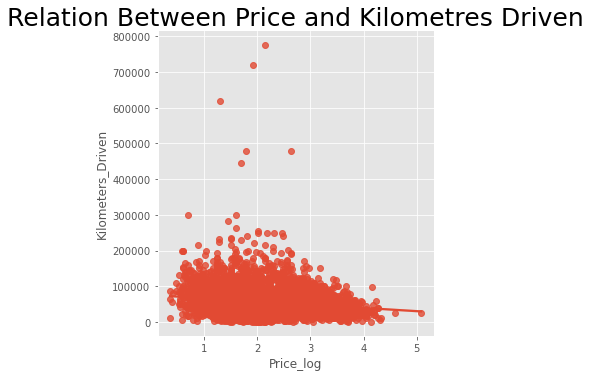

In [134]:
sns.lmplot('Price_log','Kilometers_Driven',data=df_train)
plt.title('Relation Between Price and Kilometres Driven',fontsize=25)

### Much relation between car price and kilometres driven can't be seen

Text(0.5, 1.0, 'Relation Between Price and Fuel Type')

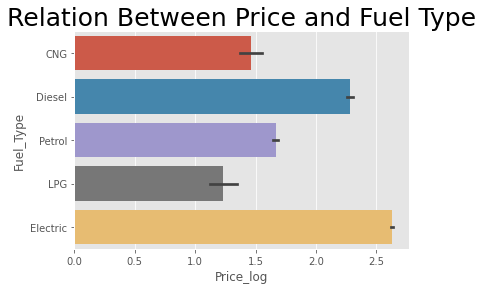

In [135]:
sns.barplot( x="Price_log", y="Fuel_Type", data=df_train)
plt.title('Relation Between Price and Fuel Type',fontsize=25)

### Electric cars are most costly followed by diesel , petrol, cng and lpg repectively

Text(0.5, 1.0, 'Relation Between Price and Mode of Transmission')

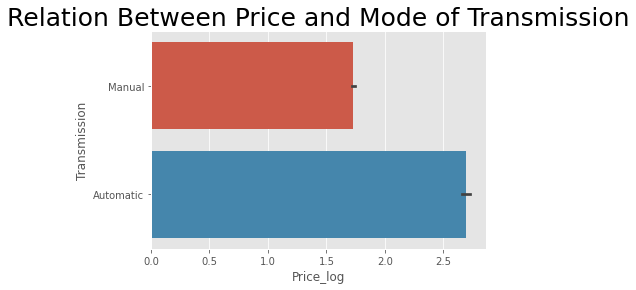

In [136]:
sns.barplot( x="Price_log", y="Transmission", data=df_train)
plt.title('Relation Between Price and Mode of Transmission',fontsize=25)

### Automatic cars are costlier than the manual cars
 

Text(0.5, 1.0, 'Relation Between Price and OwnerType')

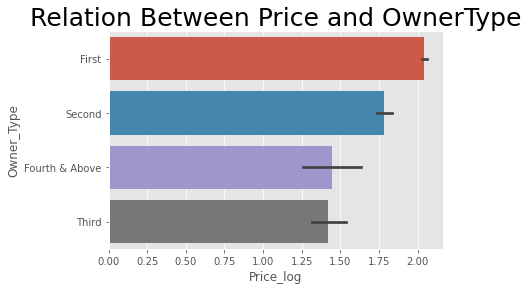

In [137]:
sns.barplot( x="Price_log", y="Owner_Type", data=df_train)
plt.title('Relation Between Price and OwnerType',fontsize=25)

### First hand are most costly and then second hand and then others

Text(0.5, 1.0, 'Relation Between Price and Mileage')

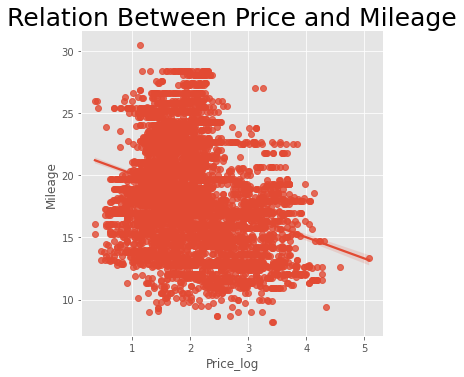

In [138]:
sns.lmplot('Price_log','Mileage',data=df_train)
plt.title('Relation Between Price and Mileage',fontsize=25)

### Very accurate relation can't be seen between the cost and mileage

Text(0.5, 1.0, 'Relation Between Price and Engine')

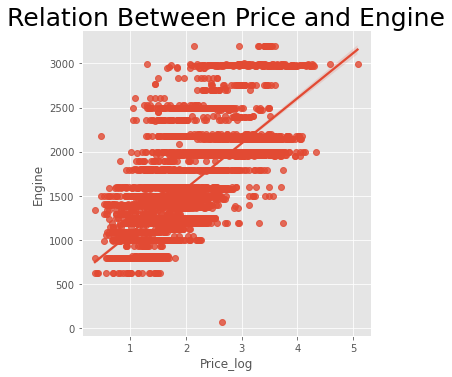

In [139]:
sns.lmplot('Price_log','Engine',data=df_train)
plt.title('Relation Between Price and Engine',fontsize=25)

###  Price of car is increasing with increase in Engine capacity

Text(0.5, 1.0, 'Relation Between Price and Power')

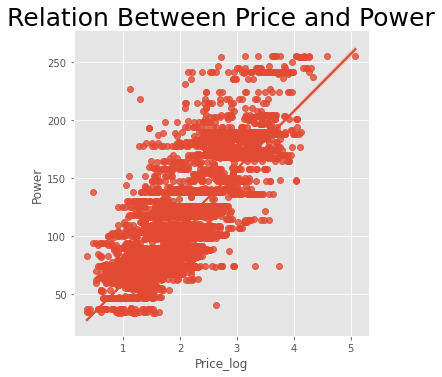

In [140]:
sns.lmplot('Price_log','Power',data=df_train)
plt.title('Relation Between Price and Power',fontsize=25)

### Price of car is increasing with increase in engine power

Text(0.5, 1.0, 'Relation Between Price and Seats')

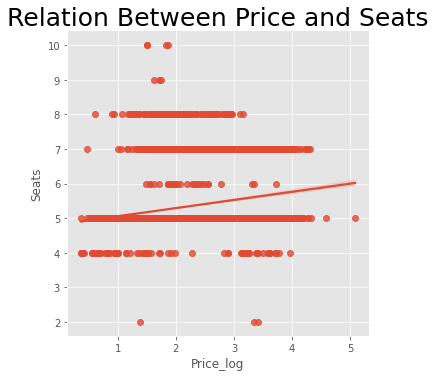

In [141]:
sns.lmplot('Price_log','Seats',data=df_train)
plt.title('Relation Between Price and Seats',fontsize=25)

# Models

In [142]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_log
0,Maruti,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.011601
1,Hyundai,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.602690
2,Honda,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.704748
3,Maruti,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.945910
4,Audi,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.930660


In [143]:
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Delhi,2014.0,40929.0,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti,Coimbatore,2013.0,54493.0,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota,Mumbai,2017.0,34000.0,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota,Hyderabad,2012.0,139000.0,Diesel,Manual,First,23.59,1364.0,74.00,5.0
4,Hyundai,Mumbai,2014.0,29000.0,Petrol,Manual,First,18.50,1197.0,82.85,5.0


In [144]:
df_train =pd.get_dummies(df_train,columns=['Name'],prefix=['Name'])
df_train =pd.get_dummies(df_train,columns=['Location'],prefix=['Location'])
df_train =pd.get_dummies(df_train,columns=['Fuel_Type'],prefix=['Fuel_Type'])
df_train =pd.get_dummies(df_train,columns=['Transmission'],prefix=['Transmission'])
df_train =pd.get_dummies(df_train,columns=['Owner_Type'],prefix=['Owner_Type'])


print(df_train.head())

     Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price_log  \
0  2010.0            72000.0    26.60   998.0   58.16    5.0   1.011601   
1  2015.0            41000.0    19.67  1582.0  126.20    5.0   2.602690   
2  2011.0            46000.0    18.20  1199.0   88.70    5.0   1.704748   
3  2012.0            87000.0    20.77  1248.0   88.76    7.0   1.945910   
4  2013.0            40670.0    15.20  1968.0  140.80    5.0   2.930660   

   Name_Audi  Name_BMW  Name_Chevrolet  ...  Fuel_Type_Diesel  \
0          0         0               0  ...                 0   
1          0         0               0  ...                 1   
2          0         0               0  ...                 0   
3          0         0               0  ...                 1   
4          1         0               0  ...                 1   

   Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  \
0                   0              0                 0   
1                   0              0      

In [145]:
df_test =pd.get_dummies(df_test,columns=['Name'],prefix=['Name'])
df_test =pd.get_dummies(df_test,columns=['Location'],prefix=['Location'])
df_test =pd.get_dummies(df_test,columns=['Fuel_Type'],prefix=['Fuel_Type'])
df_test =pd.get_dummies(df_test,columns=['Transmission'],prefix=['Transmission'])
df_test =pd.get_dummies(df_test,columns=['Owner_Type'],prefix=['Owner_Type'])

In [146]:
print(df_test.head())

     Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Name_Audi  \
0  2014.0            40929.0    32.26   998.0   58.20    4.0          0   
1  2013.0            54493.0    24.70   796.0   47.30    5.0          0   
2  2017.0            34000.0    13.68  2393.0  147.80    7.0          0   
3  2012.0           139000.0    23.59  1364.0   74.00    5.0          0   
4  2014.0            29000.0    18.50  1197.0   82.85    5.0          0   

   Name_BMW  Name_Bentley  Name_Chevrolet  ...  Fuel_Type_CNG  \
0         0             0               0  ...              1   
1         0             0               0  ...              0   
2         0             0               0  ...              0   
3         0             0               0  ...              0   
4         0             0               0  ...              0   

   Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  \
0                 0              0                 0                       0  

In [147]:
import datetime

x = datetime.datetime.now()

df_train['Year']=x.year-df_train['Year']
df_train['Year']

0       12.0
1        7.0
2       11.0
3       10.0
4        9.0
        ... 
6014     8.0
6015     7.0
6016    10.0
6017     9.0
6018    11.0
Name: Year, Length: 5817, dtype: float64

In [148]:
import datetime

x = datetime.datetime.now()

df_test['Year']=x.year-df_test['Year']
df_test['Year']

0        8.0
1        9.0
2        5.0
3       10.0
4        8.0
        ... 
1229    11.0
1230     7.0
1231    10.0
1232     9.0
1233     8.0
Name: Year, Length: 1234, dtype: float64

In [149]:
df_train.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price_log', 'Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun',
       'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Honda', 'Name_Hyundai',
       'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep', 'Name_Land', 'Name_Mahindra',
       'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi',
       'Name_Nissan', 'Name_Porsche', 'Name_Renault', 'Name_Skoda',
       'Name_Smart', 'Name_Tata', 'Name_Toyota', 'Name_Volkswagen',
       'Name_Volvo', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'O

In [150]:
df_test.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Name_Audi', 'Name_BMW', 'Name_Bentley', 'Name_Chevrolet',
       'Name_Datsun', 'Name_Fiat', 'Name_Ford', 'Name_Hindustan', 'Name_Honda',
       'Name_Hyundai', 'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep', 'Name_Land',
       'Name_Mahindra', 'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini',
       'Name_Mitsubishi', 'Name_Nissan', 'Name_OpelCorsa', 'Name_Porsche',
       'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',
       'Name_Volkswagen', 'Name_Volvo', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_S

In [151]:
X = df_train[['Year',  'Engine', 'Power', 'Seats', 'Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun',
       'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Honda', 'Name_Hyundai',
       'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep', 'Name_Land', 'Name_Mahindra',
       'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi',
       'Name_Nissan', 'Name_Porsche', 'Name_Renault', 'Name_Skoda',
       'Name_Smart', 'Name_Tata', 'Name_Toyota', 'Name_Volkswagen',
       'Name_Volvo', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third']]
y = df_train['Price_log']

In [152]:
df_test.insert(0, 'Fuel_Type_Electric', 0)
df_test.insert(0, 'Name_Smart', 0)
df_test['Fuel_Type_Electric']


0       0
1       0
2       0
3       0
4       0
       ..
1229    0
1230    0
1231    0
1232    0
1233    0
Name: Fuel_Type_Electric, Length: 1234, dtype: int64

In [153]:
df_test.insert(0, 'Name_Force', 0)
df_test['Name_Force']

0       0
1       0
2       0
3       0
4       0
       ..
1229    0
1230    0
1231    0
1232    0
1233    0
Name: Name_Force, Length: 1234, dtype: int64

In [154]:
test = df_test[['Year',  'Engine', 'Power', 'Seats', 'Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun',
       'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Honda', 'Name_Hyundai',
       'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep', 'Name_Land', 'Name_Mahindra',
       'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi',
       'Name_Nissan', 'Name_Porsche', 'Name_Renault', 'Name_Skoda',
       'Name_Smart', 'Name_Tata', 'Name_Toyota', 'Name_Volkswagen',
       'Name_Volvo', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third']]

### Splitting the data for training the model

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Linear Regression Model

In [156]:
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

LinearRegression()

In [157]:
linreg.score(X_train, y_train)

0.9268105370437074

In [158]:
linreg.score(X_test, y_test)

0.9273129023225495

In [159]:
df_test.head()

,Name_Force,Name_Smart,Fuel_Type_Electric,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Name_Audi,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,8.0,40929.0,32.26,998.0,58.20,4.0,0,...,1,0,0,0,0,1,1,0,0,0
1,0,0,0,9.0,54493.0,24.70,796.0,47.30,5.0,0,...,0,0,0,1,0,1,0,0,1,0
2,0,0,0,5.0,34000.0,13.68,2393.0,147.80,7.0,0,...,0,1,0,0,0,1,1,0,0,0
3,0,0,0,10.0,139000.0,23.59,1364.0,74.00,5.0,0,...,0,1,0,0,0,1,1,0,0,0
4,0,0,0,8.0,29000.0,18.50,1197.0,82.85,5.0,0,...,0,0,0,1,0,1,1,0,0,0


#### Predicting Price of Test dataset using Linear Regression

In [160]:
pred1=linreg.predict(test)
price1=np.expm1(pred1)
dataset_test.insert(11, "Price", price1) 
print(dataset_test.head())

      Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti       Delhi  2014              40929       CNG       Manual   
1   Maruti  Coimbatore  2013              54493    Petrol       Manual   
2   Toyota      Mumbai  2017              34000    Diesel       Manual   
3   Toyota   Hyderabad  2012             139000    Diesel       Manual   
4  Hyundai      Mumbai  2014              29000    Petrol       Manual   

  Owner_Type  Mileage  Engine   Power  Seats      Price  
0      First    32.26   998.0   58.20    4.0   2.810562  
1     Second    24.70   796.0   47.30    5.0   2.841007  
2      First    13.68  2393.0  147.80    7.0  17.170987  
3      First    23.59  1364.0   74.00    5.0   5.275103  
4      First    18.50  1197.0   82.85    5.0   4.152787  


### Gradient Boosting Regressor Model

In [161]:
clf=ensemble.GradientBoostingRegressor(n_estimators=400,max_depth=5,min_samples_split=2,learning_rate=0.1,loss='ls')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9544068336738206

#### Predicting Price of Test dataset using Gradient Boosting

In [162]:
pred0=clf.predict(test)
price0=np.expm1(pred0)
dataset_test.drop('Price',axis=1,inplace=True) 
dataset_test.insert(11, "Price", price0) 
print(dataset_test.head())

      Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti       Delhi  2014              40929       CNG       Manual   
1   Maruti  Coimbatore  2013              54493    Petrol       Manual   
2   Toyota      Mumbai  2017              34000    Diesel       Manual   
3   Toyota   Hyderabad  2012             139000    Diesel       Manual   
4  Hyundai      Mumbai  2014              29000    Petrol       Manual   

  Owner_Type  Mileage  Engine   Power  Seats      Price  
0      First    32.26   998.0   58.20    4.0   2.905606  
1     Second    24.70   796.0   47.30    5.0   3.372690  
2      First    13.68  2393.0  147.80    7.0  17.302269  
3      First    23.59  1364.0   74.00    5.0   5.386343  
4      First    18.50  1197.0   82.85    5.0   4.561088  


### Random Forest Regressor Model

In [163]:
regr = RandomForestRegressor(max_depth=20, random_state=0, n_estimators=10)
regr.fit(X_train, y_train)
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))
print('R-squared score (testing): {:.3f}'
     .format(regr.score(X_test, y_test)))

R-squared score (training): 0.985
R-squared score (testing): 0.940


#### Predicting Price of Test dataset using Random Forest


In [164]:
pred2=regr.predict(test)
price2=np.expm1(pred2)
dataset_test.drop('Price',axis=1,inplace=True) 
dataset_test.insert(11, "Price", price2) 
print(dataset_test.head())

      Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti       Delhi  2014              40929       CNG       Manual   
1   Maruti  Coimbatore  2013              54493    Petrol       Manual   
2   Toyota      Mumbai  2017              34000    Diesel       Manual   
3   Toyota   Hyderabad  2012             139000    Diesel       Manual   
4  Hyundai      Mumbai  2014              29000    Petrol       Manual   

  Owner_Type  Mileage  Engine   Power  Seats      Price  
0      First    32.26   998.0   58.20    4.0   2.724288  
1     Second    24.70   796.0   47.30    5.0   3.444013  
2      First    13.68  2393.0  147.80    7.0  17.238781  
3      First    23.59  1364.0   74.00    5.0   3.695942  
4      First    18.50  1197.0   82.85    5.0   4.494867  


### Support Vector Machine Model

In [165]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [166]:
from sklearn.metrics import classification_report
regressor.score(X_test,y_test)

0.6418874863941659

#### Prediction using SVM


In [167]:
pred3=regressor.predict(test)
price3=np.expm1(pred3)
dataset_test.drop('Price',axis=1,inplace=True) 
dataset_test.insert(11, "Price", price3) 
print(dataset_test.head())

      Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti       Delhi  2014              40929       CNG       Manual   
1   Maruti  Coimbatore  2013              54493    Petrol       Manual   
2   Toyota      Mumbai  2017              34000    Diesel       Manual   
3   Toyota   Hyderabad  2012             139000    Diesel       Manual   
4  Hyundai      Mumbai  2014              29000    Petrol       Manual   

  Owner_Type  Mileage  Engine   Power  Seats      Price  
0      First    32.26   998.0   58.20    4.0   3.100884  
1     Second    24.70   796.0   47.30    5.0   2.516011  
2      First    13.68  2393.0  147.80    7.0  12.843590  
3      First    23.59  1364.0   74.00    5.0   4.163357  
4      First    18.50  1197.0   82.85    5.0   4.297676  


### Decision Tree Model

In [168]:
from sklearn.tree import DecisionTreeClassifier
regr_1 = DecisionTreeRegressor(max_depth=7)
regr_1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [169]:
y_pred = regr_1.predict(X_test)

#### Prediction Using Decision Tree

In [170]:
pred5=regr_1.predict(test)
price5=np.expm1(pred5)
dataset_test.drop('Price',axis=1,inplace=True) 
dataset_test.insert(11, "Price", price5) 
print(dataset_test.head())

      Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti       Delhi  2014              40929       CNG       Manual   
1   Maruti  Coimbatore  2013              54493    Petrol       Manual   
2   Toyota      Mumbai  2017              34000    Diesel       Manual   
3   Toyota   Hyderabad  2012             139000    Diesel       Manual   
4  Hyundai      Mumbai  2014              29000    Petrol       Manual   

  Owner_Type  Mileage  Engine   Power  Seats      Price  
0      First    32.26   998.0   58.20    4.0   3.416910  
1     Second    24.70   796.0   47.30    5.0   2.955104  
2      First    13.68  2393.0  147.80    7.0  19.352922  
3      First    23.59  1364.0   74.00    5.0   3.548677  
4      First    18.50  1197.0   82.85    5.0   4.575678  


In [171]:
regr_1.score(X_test,y_test)

0.8888254249695186

## Accuracy scores
.

#### Multiple Linear Regression - 92.56%


#### Gradient Boosting Regression - 95.43%

#### Random Forest Regression - 93.56%


Support Vector Machine Regression - 62.16%


#### Decision Tree Regression - 88.78%


### Hence , Gradient Boosting Regression model is the best suited for this dataset